In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split

2023-12-16 20:41:29.419467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 20:41:29.495310: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-16 20:41:29.874123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/renlei/TensorRT-8.4.1.5/lib:/usr/local/cuda-11.6/lib64:
2023-12-16 20:41:29.87417

### 本地csv中导入mnist数据 

In [2]:
train = pd.read_csv("./CNN for MINST dataset/train.csv")
test = pd.read_csv("./CNN for MINST dataset/test.csv")
target=train['label']
features=train.drop(labels='label',axis=1)#pd.drop():Return new object with labels in requested axis removed.
#print(target.shape,features.shape)
## normalize
features=features.astype('float32')
test=test.astype('float32')
features/=255.0
test/=255.0
## Reshape image in 3 dimensions (height = 28, width = 28 , channel = 1)
height,width ,channel= 28,28,1
features=features.values.reshape(-1,height,width,channel)
test=test.values.reshape(-1,height,width,channel)

## Encode labels to one hot vectors
target=to_categorical(target,num_classes=10)

## Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.1)

### tensorflow.keras 库中导入mnist数据

In [3]:
from tensorflow.keras.datasets import mnist
(trainx,trainy),(testx,testy)=mnist.load_data()
### convert mnist data to 28x28x1
X_train=trainx.reshape([-1,28,28,1])
x_test=testx.reshape([testx.shape[0],28,28,1])
### normlized
X_train=X_train.astype('float32')
x_test=x_test.astype('float32')
### 将label 值转换为需要的格式(one-hot编码)
Y_train=to_categorical(trainy,10)
y_test=to_categorical(testy,10)
print(X_train.shape,x_test.shape,Y_train.shape,type(trainx))
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) <class 'numpy.ndarray'>


### 构建 LeNet-5 model

In [4]:
model = Sequential()
# 卷积层
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 全连接层
model.add(Flatten())#Flatten():将输入展平。不影响批量大小
model.add(Dense(512, activation = "relu", use_bias= True))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax", use_bias= True))

2023-12-16 20:41:32.438200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-16 20:41:32.460062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-16 20:41:32.460208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-16 20:41:32.460680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

### fit results

In [5]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
## 使用 validation_split 分割数据
#results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50)
## 使用train_test_split()分割的validation_data
fit_results = model.fit(X_train, Y_train, validation_data = (X_val,Y_val), batch_size=16, epochs=50)

Epoch 1/50


2023-12-16 20:41:33.844455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8904
2023-12-16 20:41:33.928561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-16 20:41:33.930330: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f4358899a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-16 20:41:33.930343: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-16 20:41:33.942938: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-16 20:41:34.095900: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime 

3375/3375 [==============================] - 8s 2ms/step - loss: 0.2571 - accuracy: 0.9462 - val_loss: 0.0809 - val_accuracy: 0.9795
Epoch 2/50
3375/3375 [==============================] - 6s 2ms/step - loss: 0.1154 - accuracy: 0.9693 - val_loss: 0.0741 - val_accuracy: 0.9753
Epoch 3/50
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0985 - accuracy: 0.9728 - val_loss: 0.0773 - val_accuracy: 0.9817
Epoch 4/50
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0949 - accuracy: 0.9756 - val_loss: 0.0861 - val_accuracy: 0.9775
Epoch 5/50
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0878 - accuracy: 0.9778 - val_loss: 0.0680 - val_accuracy: 0.9837
Epoch 6/50
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0818 - accuracy: 0.9799 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 7/50
3375/3375 [==============================] - 8s 2ms/step - loss: 0.0909 - accuracy: 0.9787 - val_loss: 0.1136 - val_accuracy: 0.9823
Epo

### predict results 为输入样本test生成输出预测

In [6]:
results = model.predict(test)
# select the indix with the maximum probability
pre_results = np.argmax(results,axis = 1)
pre_results = pd.Series(pre_results,name="Label")
# 预测结果save到本地csv文件
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pre_results],axis = 1)
submission.to_csv("./CNN for MINST dataset/LeNet_test_prediction.csv",index=False)

875/875 [==============================] - 1s 849us/step


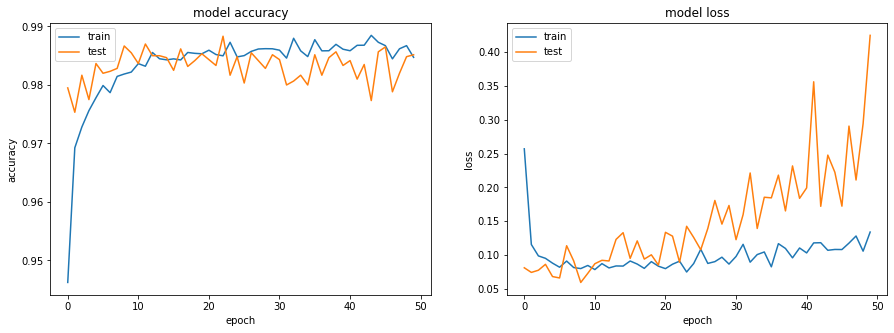

In [12]:
#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(fit_results.history['accuracy'])
plt.plot(fit_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(fit_results.history['loss'])
plt.plot(fit_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()